# Grant Hihn / nordiCode

## Research question/interests
The popularity of a programming language to the programmer's salary and if certain languages generally complement eachother in industry? Are niche languages paid more? What's the most popular poorly paid programming language?

In [76]:
import os # to get to document and open it
import pandas as pd # for analysis
import numpy as np # also for analysis
import seaborn as sns # for visual analysis
import matplotlib.pyplot as plt #for visual analysis

To load the raw csv data into a pandas dataframe.

In [25]:
df = pd.read_csv('../data/raw/survey_results_public.csv')

In [26]:
df.head() # The first five rows of the dataframe.

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [27]:
df.tail() # A look at the last five rows.

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0
83438,83439,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,"Professional degree (JD, MD, etc.)",11 - 17 years,School,14,...,18-24 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,Appropriate in length,Easy,21168.0


In [16]:
df.shape # How many rows and columns.

(83439, 48)

In [29]:
df.columns # Names of the columns in the dataframe.

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [28]:
df.isnull().sum() # How many missing values in each column.

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

In [18]:
df.describe().round()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.0,4.718300e+04,46844.0
mean,41720.0,2.119407e+69,118426.0
std,24087.0,4.603702e+71,527294.0
min,1.0,0.000000e+00,1.0
25%,20860.0,1.600000e+04,27025.0
50%,41720.0,6.700000e+04,56211.0
75%,62580.0,1.400000e+05,100000.0
max,83439.0,1.000000e+74,45241312.0


Analysing the programming languages column of the dataframe. Iterating through the column splitting the row into a list then counting the occurences in that row of certain languages.  

In [89]:
count_cpp = 0
count_kotlin = 0
count_haskell = 0


for index, row in df.iterrows():
    str_row = str(row['LanguageHaveWorkedWith'])
    list_row = str_row.split(";")
    if ( 'Kotlin' in list_row):
        count_kotlin += 1
    elif ('C++' in list_row):
        count_cpp += 1
    elif ('Haskell' in list_row):
        count_haskell += 1

print("Imperative language: C++ count: ", count_cpp)
print("Imperative/Functional language: Kotlin count: ", count_kotlin)
print("Purely Functional language: Haskell count: ", count_haskell)

Imperative language: C++ count:  18008
Imperative/Functional language: Kotlin count:  6866
Purely Functional language: Haskell count:  784


In [90]:
total_respondees = df.shape[0]
print("Percentage of total respondees using C++ :", round((count_cpp/total_respondees)*100,2 ),"%" )
print("Percentage of total respondees using Kotlin :", round((count_kotlin/total_respondees)*100,2 ),"%" )
print("Percentage of total respondees using Haskell :", round((count_haskell/total_respondees)*100,2 ),"%" )

Percentage of total respondees using C++ : 21.58 %
Percentage of total respondees using Kotlin : 8.23 %
Percentage of total respondees using Haskell : 0.94 %


<AxesSubplot:xlabel='Programming Language'>

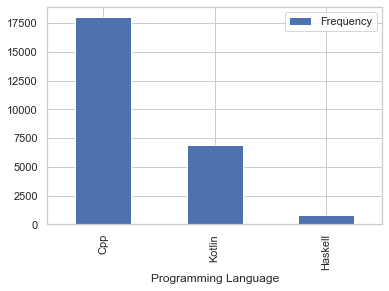

In [93]:
languages_counts = [('Cpp',count_cpp),('Kotlin',count_kotlin),('Haskell',count_haskell)]
lang_df = pd.DataFrame(languages_counts, columns = ['Programming Language','Frequency'])
lang_df.plot(kind='bar',x='Programming Language')